In [104]:
import pandas as pd
import numpy as np

In [57]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold # because of class imbalance
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, log_loss, brier_score_loss, ConfusionMatrixDisplay

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [29]:
df = pd.read_csv('stage_data/selected.csv')
df

,year,rank,overall_wins,overall_win_loss_percentage,conference_wins,conference_losses,own_points_per_game,simple_rating_system,ap_pre,ap_high,...,conference_tournament_champion,poy,points,steals,steals per game,assists,assists per game,blocks,blocks per game,champion
0,1985,2,35,0.921,14,2,74.0,5.77,1,1,...,True,1,0,0,0,0,0,1,0,0
1,1985,6,12,0.387,6,8,65.0,-6.89,26,26,...,True,0,0,0,0,0,0,0,0,0
2,1985,2,25,0.806,15,3,64.8,0.67,26,26,...,True,0,0,0,0,0,0,0,0,0
3,1985,2,20,0.690,10,4,80.3,2.41,15,11,...,False,0,0,0,0,0,0,0,0,0
4,1985,2,23,0.697,10,6,75.7,3.33,10,2,...,False,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541,2025,2,27,0.771,14,4,76.6,-3.95,26,26,...,True,0,0,0,0,0,0,0,0,0
2542,2025,6,21,0.618,11,9,76.1,13.56,1,1,...,False,0,0,0,0,0,0,0,0,0
2543,2025,10,22,0.611,8,10,76.8,11.70,16,16,...,False,0,0,0,0,0,0,0,0,0
2544,2025,1,31,0.861,18,2,78.5,8.56,26,5,...,True,0,0,0,0,0,0,0,0,0


In [30]:
# this is the data for 2025
curr_df = df[df['year'] == 2025]

In [31]:
df = df[df['year'] != 2025]

In [32]:
X = df.drop('champion', axis=1)
y = df['champion']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=6740)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## KNN

In [53]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': list(range(5, 16)),
    'weights': ['uniform', 'distance']
}
gs_knn = GridSearchCV(knn, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=6740), scoring='roc_auc')
gs_knn.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=6740, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [54]:
b_knn = gs_knn.best_estimator_
gs_knn.best_params_

{'n_neighbors': 14, 'weights': 'distance'}

In [55]:
y_pred = b_knn.predict(X_test_scaled)
y_prob = b_knn.predict_proba(X_test_scaled)[:, 1]

(0.9871175523349437,
 array([[613,   0],
        [  8,   0]]),
 0.9814437194127243,
 0.033324448473935,
 0.009443378860354934)

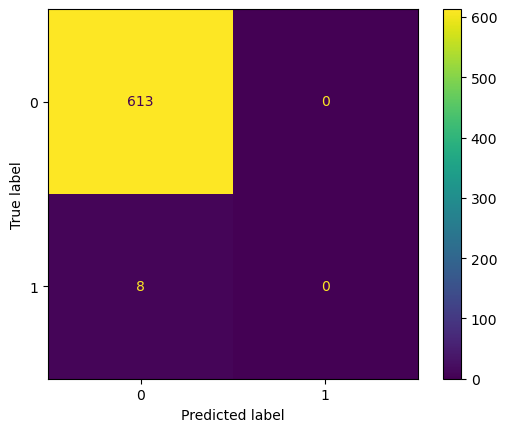

In [59]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
conf_plt = ConfusionMatrixDisplay(conf)
conf_plt.plot()

roc = roc_auc_score(y_test, y_prob)
loss = log_loss(y_test, y_prob)
bri = brier_score_loss(y_test, y_prob)

acc, conf, roc, loss, bri

## Logistic Regression

In [64]:
lr = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear']
}
gs_lr = GridSearchCV(lr, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=6740), scoring='roc_auc')
gs_lr.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=6740, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10], 'solver': ['liblinear']},
             scoring='roc_auc')

In [65]:
b_lr = gs_lr.best_estimator_
gs_lr.best_params_

{'C': 10, 'solver': 'liblinear'}

In [66]:
y_pred = b_lr.predict(X_test_scaled)
y_prob = b_lr.predict_proba(X_test_scaled)[:, 1]

(0.9903381642512077,
 array([[611,   2],
        [  4,   4]]),
 0.9390293637846656,
 0.03378077531765292,
 0.007015826991910838)

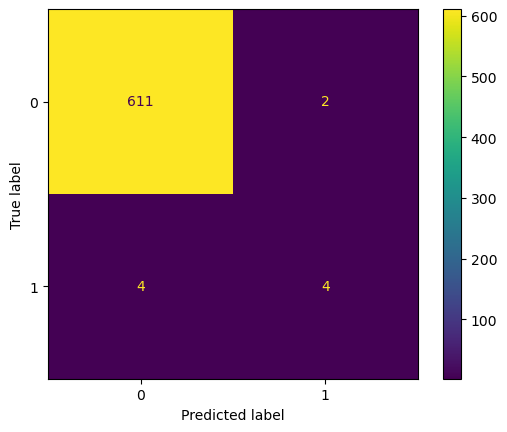

In [67]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
conf_plt = ConfusionMatrixDisplay(conf)
conf_plt.plot()

roc = roc_auc_score(y_test, y_prob)
loss = log_loss(y_test, y_prob)
bri = brier_score_loss(y_test, y_prob)

acc, conf, roc, loss, bri

## Random Forest

In [76]:
rf = RandomForestClassifier(random_state=6740)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 15],
    'min_samples_leaf': [1, 2, 5]
}
gs_rf = GridSearchCV(rf, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=6740), scoring='roc_auc')
gs_rf.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=6740, shuffle=True),
             estimator=RandomForestClassifier(random_state=6740),
             param_grid={'max_depth': [None, 10, 15],
                         'min_samples_leaf': [1, 2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [77]:
b_rf = gs_rf.best_estimator_
gs_rf.best_params_

{'max_depth': None, 'min_samples_leaf': 2, 'n_estimators': 200}

In [78]:
y_pred = b_rf.predict(X_test_scaled)
y_prob = b_rf.predict_proba(X_test_scaled)[:, 1]

(0.9887278582930756,
 array([[613,   0],
        [  7,   1]]),
 0.9971451876019576,
 0.02683217912127881,
 0.007342644687009422)

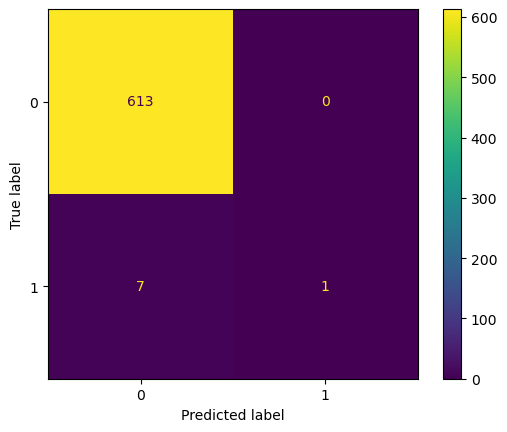

In [79]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
conf_plt = ConfusionMatrixDisplay(conf)
conf_plt.plot()

roc = roc_auc_score(y_test, y_prob)
loss = log_loss(y_test, y_prob)
bri = brier_score_loss(y_test, y_prob)

acc, conf, roc, loss, bri

## Naive Bayes Classifier

In [80]:
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)

GaussianNB()

In [81]:
y_pred = nb.predict(X_test_scaled)
y_prob = nb.predict_proba(X_test_scaled)[:, 1]

(0.6022544283413849,
 array([[367, 246],
        [  1,   7]]),
 0.8509380097879282,
 8.043076431515175,
 0.38913836322122897)

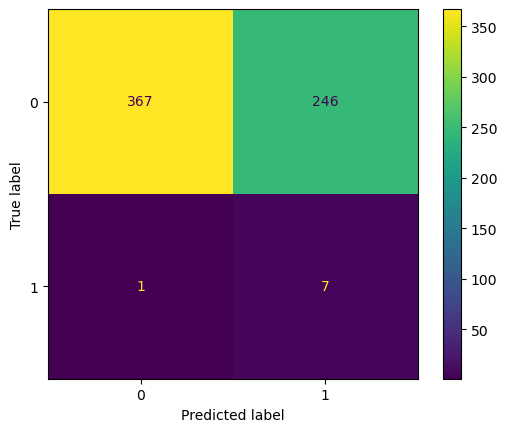

In [82]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
conf_plt = ConfusionMatrixDisplay(conf)
conf_plt.plot()

roc = roc_auc_score(y_test, y_prob)
loss = log_loss(y_test, y_prob)
bri = brier_score_loss(y_test, y_prob)

acc, conf, roc, loss, bri

## Simple Neural Network

In [84]:
nn = MLPClassifier(max_iter=1000, random_state=6740)
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam']
}
gs_nn = GridSearchCV(nn, param_grid, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=6740), scoring='roc_auc')
gs_nn.fit(X_train_scaled, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=6740, shuffle=True),
             estimator=MLPClassifier(max_iter=1000, random_state=6740),
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(50,), (100,)],
                         'solver': ['lbfgs', 'sgd', 'adam']},
             scoring='roc_auc')

In [85]:
b_nn = gs_nn.best_estimator_
gs_nn.best_params_

{'activation': 'logistic', 'hidden_layer_sizes': (100,), 'solver': 'adam'}

In [86]:
y_pred = b_nn.predict(X_test_scaled)
y_prob = b_nn.predict_proba(X_test_scaled)[:, 1]

(0.9887278582930756,
 array([[612,   1],
        [  6,   2]]),
 0.9622756933115824,
 0.03409508866224123,
 0.008151619149446723)

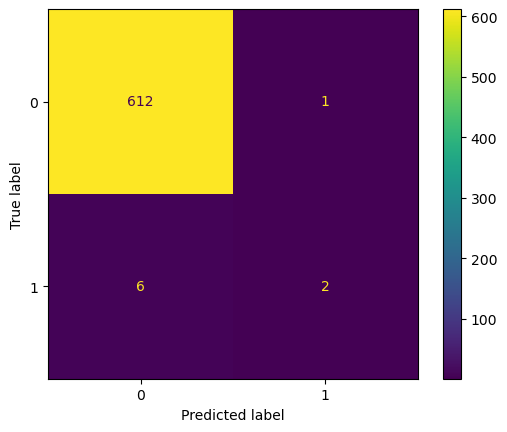

In [87]:
acc = accuracy_score(y_test, y_pred)
conf = confusion_matrix(y_test, y_pred)
conf_plt = ConfusionMatrixDisplay(conf)
conf_plt.plot()

roc = roc_auc_score(y_test, y_prob)
loss = log_loss(y_test, y_prob)
bri = brier_score_loss(y_test, y_prob)

acc, conf, roc, loss, bri

## Predicting the 2025 Tournament Winner

In [90]:
model = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=2)
X_old = scaler.transform(X)
model.fit(X_old, y)

RandomForestClassifier(min_samples_leaf=2, n_estimators=200)

In [97]:
X_2025 = scaler.transform(curr_df.drop('champion', axis=1))
y_2025 = curr_df['champion']

In [101]:
y_pred = model.predict(X_2025)
y_prob = model.predict_proba(X_2025)[:,1]

In [112]:
np.argmax(y_prob)

48

In [113]:
np.max(y_prob)

0.44149368686868684

In [ ]:
y_prob

In [111]:
curr_df.reset_index(drop=True).iloc[48]

year                              2025
rank                                 2
overall_wins                        36
overall_win_loss_percentage        0.9
conference_wins                     14
conference_losses                    4
own_points_per_game               84.8
simple_rating_system              12.6
ap_pre                              21
ap_high                              1
ap_final                             1
conference_tournament_champion    True
poy                                  0
points                               0
steals                               0
steals per game                      0
assists                              0
assists per game                     0
blocks                               0
blocks per game                      0
champion                             1
Name: 48, dtype: object